# ALGORITMO KMEANS
Se aplicará el algoritmo no supervisado "Kmeans" para agrupar los datos de la encuesta estadística utilizada. 
Para realizar esto se eliminarán la columna de ID y las tres columnas utilizadas como target en los análisis anteriores que correspondian a la ocurrencia de colesterol, diabetes e hipertensión
El análisis supervisado se basó en determinar cuales son las características más influyentes por región en la ocurrencia de las enfermedades mencionadas de modo de poder proyectar
políticas regionales de forma más precisa.
En este análisis de clusterización se buscará agrupar en clusters los datos (sin tener en cuenta las columnas target) y se compararán los grupos obtenidos con las regiones de forma
de determinar si las regiones son realmente importantes en la agrupación de los datos.
###

In [35]:
#importamos librerías

import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [36]:
# IMPORTACIÓN DEL DATASET REDUCIDO LUEGO DEL PROCESAMIENTO DE COLUMNAS

df = pd.read_csv('friesgo_2018_reduc.csv',  sep=',', encoding='utf-8')

In [37]:
#muevo columnas de variables dependiendtes (enfermedades) al final

columnas_alFinal = [ 'dijeron_diabetes','veces_presion_alta', 'colesterol_alto']

df = df[[col for col in df if col not in columnas_alFinal] + columnas_alFinal]

#print (df.iloc[:,-3:]) 

In [38]:
#conjunto de datos sin las 3 columnas target y sin ID

X1 = df.iloc[:, 1:-3]  # Todas las columnas menos las últimas tres y la primera (id)
X1.shape

(25637, 97)

# 1) REDUCCIÓN DE LA DIMENSIONALIDAD DEL DATASET

<Figure size 1200x1200 with 0 Axes>

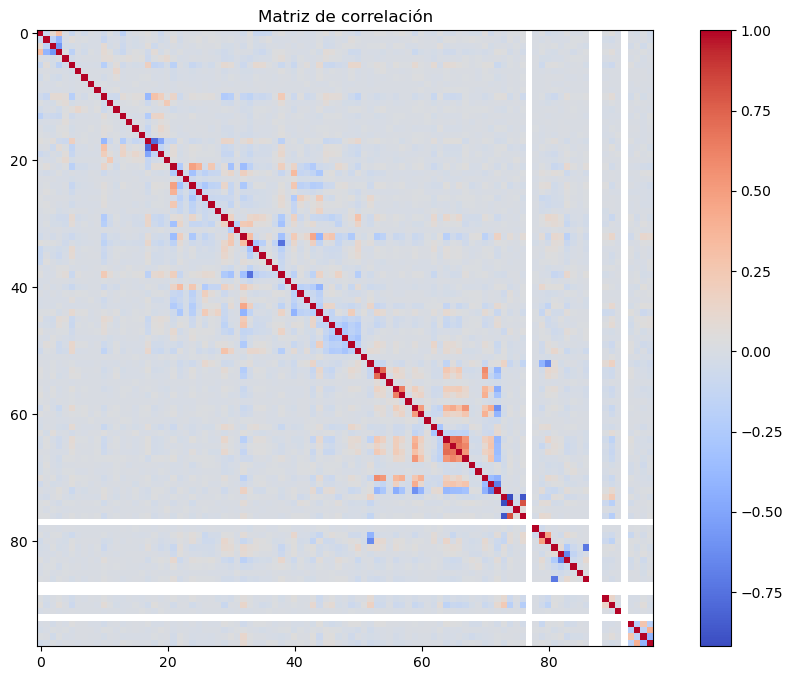

In [39]:
#  1. Análisis de correlación para determinar columnas altamente correlacionadas y eliminarlas

matriz_correlacion = pd.DataFrame(X1).corr()
plt.figure(figsize=(12, 8))
plt.imshow(matriz_correlacion, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.title("Matriz de correlación")
plt.show()

In [40]:
# Identificar pares de variables con alta correlación

threshold = 0.75  # Establecer un umbral para lo que consideramos "alta" correlación
high_corr = np.where(np.abs(matriz_correlacion) > threshold)
high_corr_pairs = [(matriz_correlacion.index[x], matriz_correlacion.columns[y]) for x, y in zip(*high_corr) if x != y and x < y]

In [41]:
    
# Mostrar pares de variables altamente correlacionadas

for pair in high_corr_pairs:
    print(f"Variables altamente correlacionadas: {pair[0]} y {pair[1]} con coeficiente {matriz_correlacion.loc[pair[0], pair[1]]:.2f}")


Variables altamente correlacionadas: baño_1 y baño_2 con coeficiente -0.77
Variables altamente correlacionadas: alguna_vez_fumo y edad_fumo_primera_vez con coeficiente -0.92
Variables altamente correlacionadas: alguna_vez_fumo y actualmente_fuma_cigarrillos con coeficiente -0.87
Variables altamente correlacionadas: edad_fumo_primera_vez y actualmente_fuma_cigarrillos con coeficiente 0.81


In [42]:
# Eliminamos 1 de las columnas altamente correlacionadas

#columns_to_drop = [18, 74, 76]
columns_to_drop = ['baño_2', 'edad_fumo_primera_vez', 'actualmente_fuma_cigarrillos']
X_reduced= X1.drop(columns=columns_to_drop)


In [43]:
# 2. Escalamos el dataset antes de correr PCA

scaler = StandardScaler()
X= scaler.fit_transform(X_reduced)

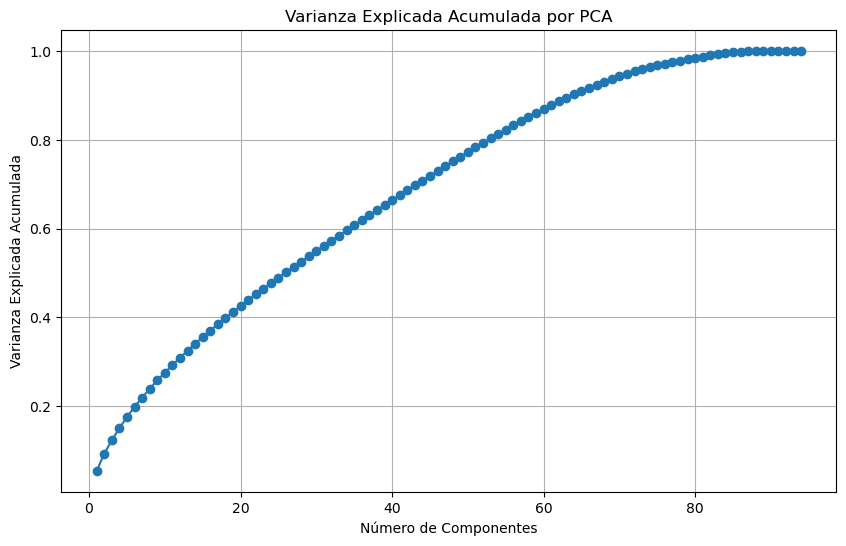

Para alcanzar al menos el 80% de la varianza explicada, se necesitan 53 componentes.


In [44]:
# 3. Aplicamos PCA para poder reducir dimensionalidad

pca = PCA()

# Ajustar PCA a los datos estandarizados
X_pca = pca.fit_transform(X)


# Verificar la varianza explicada acumulada
varianza_explicada_acumulada = np.cumsum(pca.explained_variance_ratio_)


# Graficar la varianza explicada acumulada para decidir el número de componentes
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(varianza_explicada_acumulada) + 1), varianza_explicada_acumulada, marker='o')
plt.title('Varianza Explicada Acumulada por PCA')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.grid(True)
plt.show()

# Imprimir la varianza explicada acumulada con un límite de 80% o más
componentes_para_80 = np.argmax(varianza_explicada_acumulada >= 0.80) + 1
print(f"Para alcanzar al menos el 80% de la varianza explicada, se necesitan {componentes_para_80} componentes.")

### Se observa que debemos conservar al menos 53 componentes para mantener el 80% de la varianza explicada. Esto eliminará el 44% de las columnas

In [45]:
# Reduccion de dimensionalidad

pca = PCA(n_components=53)  # Selecciona el número de componentes principales
X_pca = pca.fit_transform(X)

In [46]:
# Se crea un dataframe con las 53 columnas resultantes

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 
                                      'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 
                                      'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28', 'PC29', 
                                      'PC30', 'PC31', 'PC32', 'PC33', 'PC34', 'PC35', 'PC36', 'PC37', 'PC38', 'PC39', 
                                      'PC40', 'PC41', 'PC42', 'PC43', 'PC44', 'PC45', 'PC46', 'PC47', 'PC48', 'PC49', 
                                      'PC50', 'PC51', 'PC52', 'PC53'])

In [47]:
#unimos 

#df_merged = pd.merge(df, pca_df, right_index=True, left_index=True)

In [48]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53
0,3.792024,1.261180,3.233400,1.293489,0.530973,1.067909,-1.153640,1.811908,0.684419,0.095475,...,0.477073,-0.600077,0.372853,0.198305,0.635730,-0.398523,-1.072321,0.149045,-0.241702,-0.263125
1,2.078887,2.861404,1.806916,0.283328,1.289188,-2.730915,0.984719,2.931121,-0.113618,-1.028031,...,0.107442,-0.840520,-0.463676,-0.276598,-0.340472,0.154000,-0.887352,0.822787,-0.373439,-0.040518
2,1.616848,2.272194,-0.085629,1.916947,-2.191077,-1.274630,-0.364420,1.948857,1.108029,-1.668541,...,1.140956,0.323312,0.814211,0.329539,0.290221,-0.665064,1.141507,0.933436,-1.326659,-0.171949
3,-2.915821,2.634740,1.176626,3.063367,-1.520499,-0.127259,0.942300,0.804053,1.636102,0.152577,...,-0.234363,1.055437,0.611593,0.088422,1.046459,-2.682307,-0.590074,-1.555707,1.944540,0.569672
4,1.890430,0.642216,0.423266,1.409001,-3.292072,2.285707,0.640363,1.886365,-0.053635,-0.928688,...,0.372531,0.640779,1.979368,0.892967,0.870172,-0.790946,0.087752,0.295152,0.451178,-0.823263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25632,0.441626,-1.669704,-2.397224,1.988384,0.257397,-0.312051,0.171518,0.322872,-1.771187,-2.004439,...,-1.115993,-1.996744,2.149693,1.102378,0.717913,1.336730,0.343856,-0.749574,-3.104906,-0.461015
25633,-1.254863,0.885030,1.818130,-2.364295,0.075942,-0.098929,-1.506905,-1.049801,-0.397468,-0.271704,...,-0.204093,0.444039,-0.332887,-0.187620,0.201088,-0.641642,-0.091462,0.352523,0.242687,-0.115452
25634,1.151199,1.403031,-1.761757,0.508330,2.179217,0.322664,0.406125,-3.220235,0.895328,-0.679392,...,-0.145945,0.214114,1.605746,0.893716,0.369691,0.544938,0.462917,-1.690822,1.128568,-0.579670
25635,1.678646,0.145630,-1.550239,-1.338780,0.041680,-1.842248,1.270256,-2.660859,-0.885962,-1.464836,...,-0.542179,0.683605,0.164506,0.072078,0.394421,0.023122,1.221152,-1.495612,0.412384,-0.518693


In [49]:
# Imprimir la varianza explicada por cada componente principal
#print('Varianza explicada')
#for i in range(53):
#    print('PC{}: {}'.format(i+1, pca.explained_variance_ratio_[i]))

In [50]:
# Imprimimos la varianza acumulada por cada componente

varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)
print(varianza_acumulada)

[0.0530596  0.09269161 0.12258481 0.15012835 0.17505042 0.19843484
 0.21890218 0.23910302 0.2577758  0.27541029 0.29245953 0.30881838
 0.32477641 0.3405801  0.35538792 0.37000573 0.38441685 0.39839404
 0.41206973 0.42564456 0.43869648 0.45158116 0.46410883 0.47657683
 0.48893044 0.50123102 0.51346024 0.52545756 0.53736748 0.54913362
 0.56079158 0.57238747 0.58393459 0.59544284 0.60691515 0.61828866
 0.62963445 0.64086869 0.652028   0.66314575 0.67422075 0.68522203
 0.69617122 0.70706079 0.71787338 0.72862229 0.73925865 0.74980074
 0.76025535 0.77055339 0.78081519 0.79095133 0.8009715 ]


### Se observa que la suma acumulada de los primeros 53 componentes explica mas del 80% de los datos
    

# Analisis de las cargas variables que afectan cada componente en mayor medida

In [51]:
# Cargas de los componentes principales.

loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(53)], index=X_reduced.columns)
#loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(10)], index=X_reduced.columns)

In [62]:
# Filtrar las cargas que tengan una magnitud mayor al umbral (0.4 para un 40%)

threshold = 0.4

loadings_filtered = loadings[(loadings.abs() >= threshold).any(axis=1)]

# Mostrar las cargas filtradas
print(loadings_filtered)

                                                         PC1       PC2  \
tamanio_aglomerado_4                               -0.051440 -0.044823   
tipo_vivienda_2                                    -0.005470 -0.070873   
tipo_vivienda_5                                     0.015505  0.004306   
tipo_vivienda_7                                     0.009335  0.006321   
obtiene_agua_3                                     -0.000051 -0.018584   
obtiene_agua_4                                     -0.015629 -0.049220   
tipo_hogar_3                                       -0.011188 -0.000480   
tipo_hogar_4                                        0.044578 -0.109166   
tipo_hogar_5                                        0.001914 -0.085552   
tipo_hogar_7                                       -0.004184 -0.101432   
asignaciones_99                                    -0.002360 -0.023313   
asociado_servicio_emergencia                       -0.001716  0.076844   
nivel_instruccion_5                   

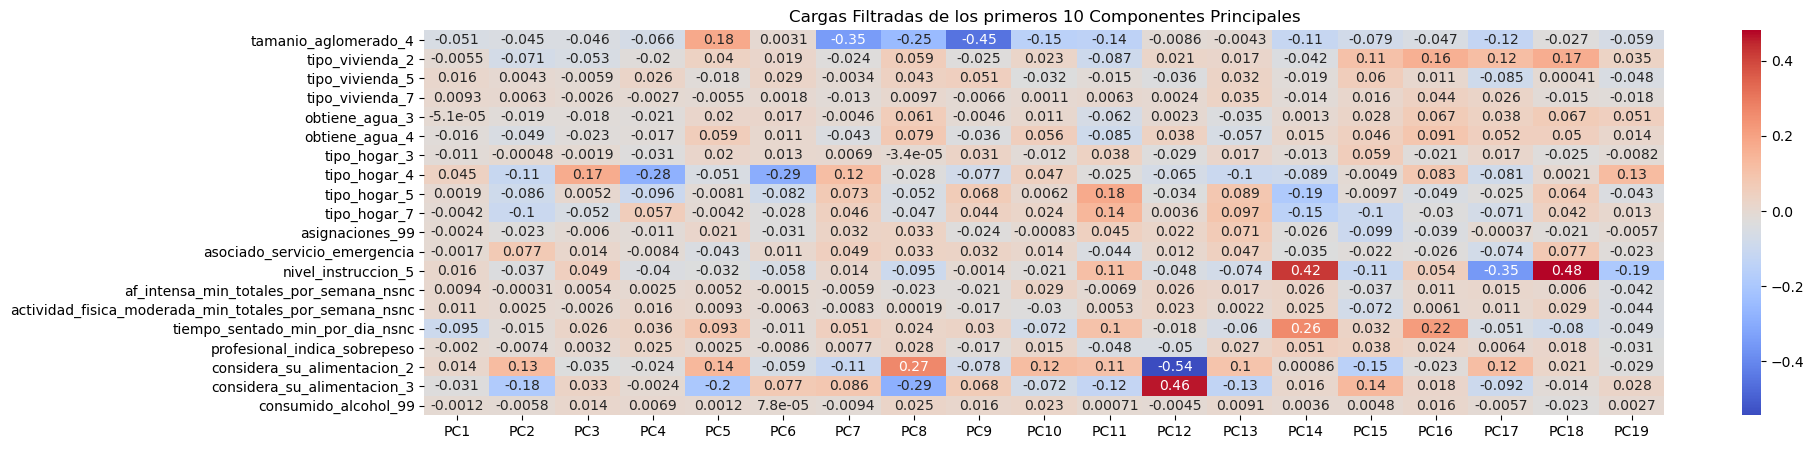

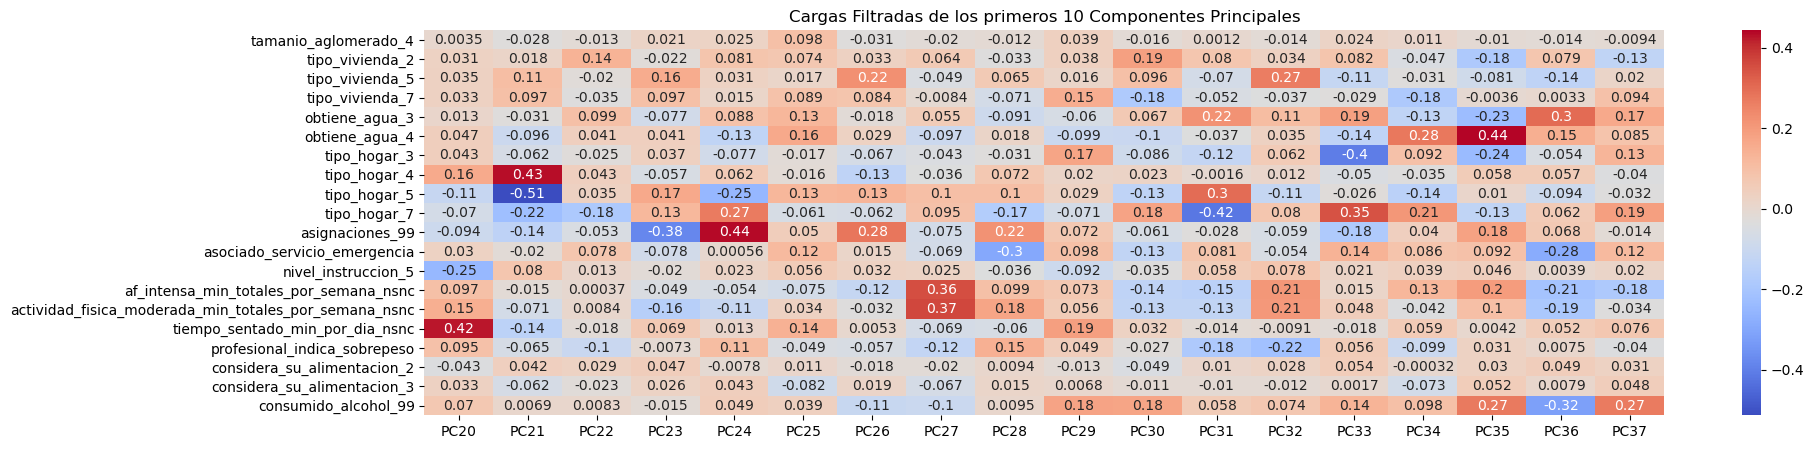

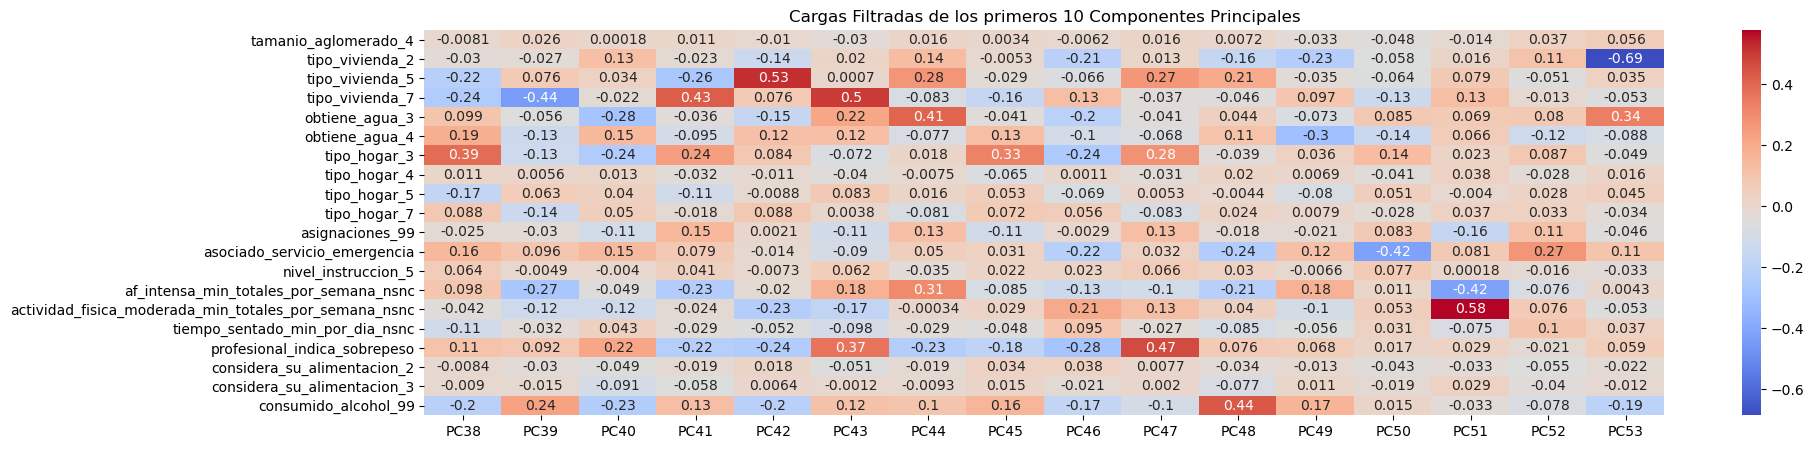

In [63]:
# Creamos un HEATMAP para observar de forma rápida si hay algunos componentes que estén altamente determinados por las regiones

columnas_primeras = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19']
columnas_segundas = ['PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28', 'PC29','PC30', 'PC31', 'PC32', 'PC33', 'PC34', 'PC35', 'PC36', 'PC37']
columnas_terceras = ['PC38', 'PC39','PC40', 'PC41', 'PC42', 'PC43', 'PC44', 'PC45', 'PC46', 'PC47', 'PC48', 'PC49','PC50', 'PC51', 'PC52', 'PC53']


plt.figure(figsize=(20, 5))
sns.heatmap(loadings_filtered[columnas_primeras], annot=True, cmap='coolwarm')
plt.title('Cargas Filtradas de los primeros 10 Componentes Principales')
plt.show()


plt.figure(figsize=(20,5))
sns.heatmap(loadings_filtered[columnas_segundas], annot=True, cmap='coolwarm')
plt.title('Cargas Filtradas de los primeros 10 Componentes Principales')
plt.show()


plt.figure(figsize=(20, 5))
sns.heatmap(loadings_filtered[columnas_terceras], annot=True, cmap='coolwarm')
plt.title('Cargas Filtradas de los primeros 10 Componentes Principales')
plt.show()

### Conclusiones de las componentes relacionadas con las características de entrada

No se oberva la característica región como una parte importante de la determinación de alguno de los compoenntes principales. 
Igualmente el análisis resulta interesante para determinar las características más destacadas en cada componente

Por ejemplo: 

1. PC12: Altamente relacionada con el tipo de alimentación
2. PC14 y PC18: Altamente relacionadas con el nivel de instrucción
3. PC20: Tiempo sentado
4. PC21: Tipo de hogar
5. PC23 y PC24: Asignaciones 99 (es decir "no sabe si tiene asignaciones"
6. PC35 y PC44: Como obtiene agua
7. PC42, PC43 y PC53: Tipo de vivienda
8. PC47: Sobrepeso
9. PC51: Actividad física

# 2) ANÁLISIS DEL NÚMERO ÓPTIMO DE CLUSTERS A CONFIGURAR 

# Aplicamos método Elbow (codo)

In [64]:
wcss = []
for i in range(1, 100):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(pca_df)
    wcss.append(km.inertia_)
    

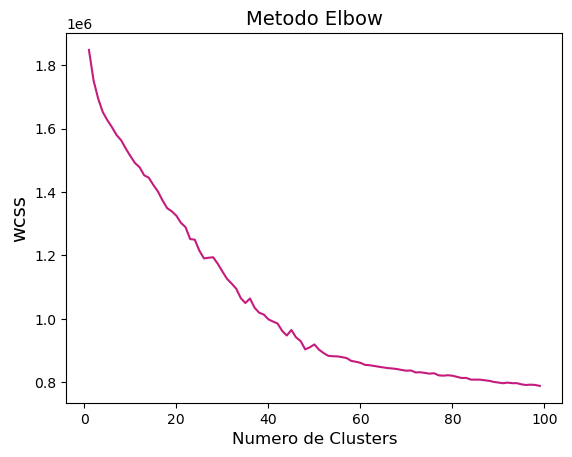

In [64]:
    
    
plt.plot(range(1, 100), wcss, c="#c51b7d")
#plt.gca().spines["top"].set_visible(False)
#plt.gca().spines["right"].set_visible(False)
plt.title('Metodo Elbow', size=14)
plt.xlabel('Numero de Clusters', size=12)
plt.ylabel('wcss', size=14)
plt.show()

### Conclusión del método del codo: utilizar 30 0 40  clusters aproximadamente. Es un número muy grande para el objetivo

# Análisis de Silhouette

In [65]:
from sklearn.metrics import silhouette_score

In [66]:

sil = []
kmax = 100


for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k, n_init=10).fit(pca_df)
    labels = kmeans.labels_
    sil.append(silhouette_score(pca_df, labels, metric='euclidean'))

    
print("fin silouette")    
    

fin silouette


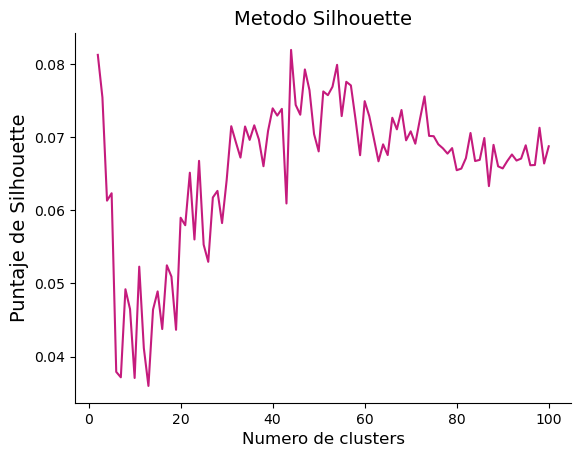

In [69]:
plt.plot(range(2,101),sil, c="#c51b7d")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title('Metodo Silhouette', size=14)
plt.xlabel('Numero de clusters', size=12)
plt.ylabel('Puntaje de Silhouette', size=14)
plt.show()

In [70]:
# Análisis de Silueta
#for n in range(2, 11):
#    kmeans = KMeans(n_clusters=n, random_state=0, n_init=10)
#    labels = kmeans.fit_predict(X_pca)
#    silhouette_avg = silhouette_score(X_pca, labels)
#    print(f'Número de clusters: {n}, Score de Silueta: {silhouette_avg}')

### Conclusión Silhouette: De acuerdo a los resultados de silueta la mejor opción serían o pocos clusters o cerca de 45. Igualmente se observa que en ambas situaciones el puntaje es muy bajo ya que el máximo es 1 y se obtienen valores cerca de 0.08. 

# 3) CLUSTERIZACIÓN CON KMEANS

Dado que lo que se desea es analizar la relacion entre las regiones y la clusterización y ambos métodos de estimación de clusters presentan valores muy altos de número pero con bajo puntaje estableceremos la siguiente métodología.
Analizaremos resultados con 10 clusters, 6 clusters y 3 clusters.

## 10 clusters

In [118]:
# Ahora aplica KMeans a los datos

kmeans = KMeans(n_clusters=10, random_state=0, n_init=10)
kmeans.fit(pca_df)

KMeans(n_clusters=10, n_init=10, random_state=0)

In [120]:

# Agrega los labels al DataFrame original
pca_df['Cluster'] = kmeans.labels_

In [121]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,Cluster
0,3.792024,1.261180,3.233400,1.293489,0.530973,1.067909,-1.153640,1.811908,0.684419,0.095475,...,-0.600077,0.372853,0.198305,0.635730,-0.398523,-1.072321,0.149045,-0.241702,-0.263125,2
1,2.078887,2.861404,1.806916,0.283328,1.289188,-2.730915,0.984719,2.931121,-0.113618,-1.028031,...,-0.840520,-0.463676,-0.276598,-0.340472,0.154000,-0.887352,0.822787,-0.373439,-0.040518,9
2,1.616848,2.272194,-0.085629,1.916947,-2.191077,-1.274630,-0.364420,1.948857,1.108029,-1.668541,...,0.323312,0.814211,0.329539,0.290221,-0.665064,1.141507,0.933436,-1.326659,-0.171949,9
3,-2.915821,2.634740,1.176626,3.063367,-1.520499,-0.127259,0.942300,0.804053,1.636102,0.152577,...,1.055437,0.611593,0.088422,1.046459,-2.682307,-0.590074,-1.555707,1.944540,0.569672,1
4,1.890430,0.642216,0.423266,1.409001,-3.292072,2.285707,0.640363,1.886365,-0.053635,-0.928688,...,0.640779,1.979368,0.892967,0.870172,-0.790946,0.087752,0.295152,0.451178,-0.823263,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25632,0.441626,-1.669704,-2.397224,1.988384,0.257397,-0.312051,0.171518,0.322872,-1.771187,-2.004439,...,-1.996744,2.149693,1.102378,0.717913,1.336730,0.343856,-0.749574,-3.104906,-0.461015,6
25633,-1.254863,0.885030,1.818130,-2.364295,0.075942,-0.098929,-1.506905,-1.049801,-0.397468,-0.271704,...,0.444039,-0.332887,-0.187620,0.201088,-0.641642,-0.091462,0.352523,0.242687,-0.115452,8
25634,1.151199,1.403031,-1.761757,0.508330,2.179217,0.322664,0.406125,-3.220235,0.895328,-0.679392,...,0.214114,1.605746,0.893716,0.369691,0.544938,0.462917,-1.690822,1.128568,-0.579670,2
25635,1.678646,0.145630,-1.550239,-1.338780,0.041680,-1.842248,1.270256,-2.660859,-0.885962,-1.464836,...,0.683605,0.164506,0.072078,0.394421,0.023122,1.221152,-1.495612,0.412384,-0.518693,3


In [122]:
#calculamos cuantos datos tengo en cada cluster para ver la distribucion

# Contar la cantidad de datos en cada cluster
cluster_counts = pca_df['Cluster'].value_counts()

# Imprimir el número de datos en cada cluster
print(cluster_counts)

3    4749
6    4561
1    4557
8    3996
2    3721
9    1801
5    1597
0     599
4      44
7      12
Name: Cluster, dtype: int64


### Se observa una fuerte disparidad en los datos por cluster




In [123]:
from mpl_toolkits.mplot3d import Axes3D  # Necesario para crear gráficos 3D

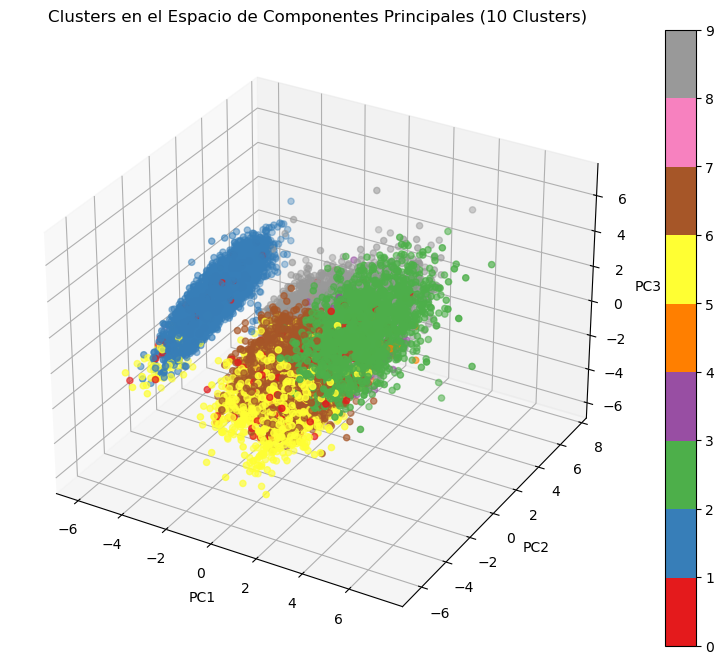

In [124]:

# Crear una figura 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Visualizar los clusters en un gráfico 3D
sc = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=pca_df['Cluster'], cmap='Set1')

# Agregar etiquetas a los ejes y título
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('Clusters en el Espacio de Componentes Principales (10 Clusters)')

# Agregar una barra de color para mostrar los clusters
plt.colorbar(sc)

# Mostrar la gráfica
plt.show()

## 6 clusters

In [125]:
# eliminamos clusterización anterior

pca_df = pca_df.drop(columns = ['Cluster'])

In [126]:
# Ahora aplica KMeans a los datos

kmeans_6 = KMeans(n_clusters=6, random_state=0, n_init=10)
kmeans_6.fit(pca_df)

KMeans(n_clusters=6, n_init=10, random_state=0)

In [127]:
# Agrega los labels al DataFrame original
pca_df['Cluster'] = kmeans_6.labels_

In [128]:
#calculamos cuantos datos tengo en cada cluster para ver la distribucion

# Contar la cantidad de datos en cada cluster
cluster_counts= pca_df['Cluster'].value_counts()

# Imprimir el número de datos en cada cluster
print(cluster_counts)

4    10082
1     6077
5     4596
2     4076
0      623
3      183
Name: Cluster, dtype: int64


Conclusión: Se observa una gran cantidad de datos en el cluster 4, luego 1, 5 y 2 con la mitad de datos y los datos 0 y 3 practicamente muy bajos en valor

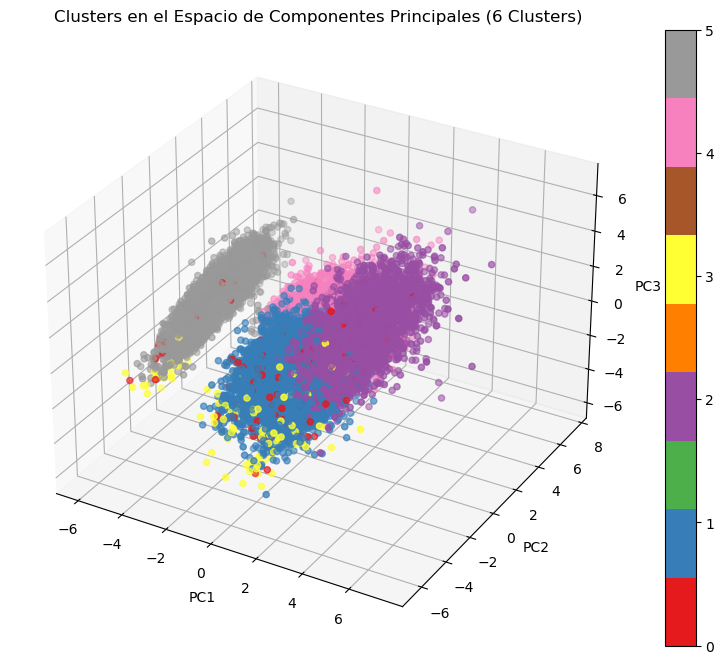

In [129]:

# Crear una figura 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Visualizar los clusters en un gráfico 3D
sc = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=pca_df['Cluster'], cmap='Set1')

# Agregar etiquetas a los ejes y título
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('Clusters en el Espacio de Componentes Principales (6 Clusters)')

# Agregar una barra de color para mostrar los clusters
plt.colorbar(sc)

# Mostrar la gráfica
plt.show()

 Del grafico de observa que tal vez 4 0 5 clusters serían lo indicado. En lugar de utilizar 3, usaremos 5 

## 5 clusters

In [130]:
# eliminamos clusterización anterior

pca_df = pca_df.drop(columns = ['Cluster'])


In [131]:
# Ahora aplica KMeans a los datos

kmeans_5 = KMeans(n_clusters=5, random_state=0, n_init=10)
kmeans_5.fit(pca_df)

KMeans(n_clusters=5, n_init=10, random_state=0)

In [132]:
# Agrega los labels al DataFrame original
pca_df['Cluster'] = kmeans_5.labels_

In [133]:
#calculamos cuantos datos tengo en cada cluster para ver la distribucion

# Contar la cantidad de datos en cada cluster
cluster_counts = pca_df['Cluster'].value_counts()

# Imprimir el número de datos en cada cluster
print(cluster_counts)

0    6428
1    5393
2    5196
4    4746
3    3874
Name: Cluster, dtype: int64


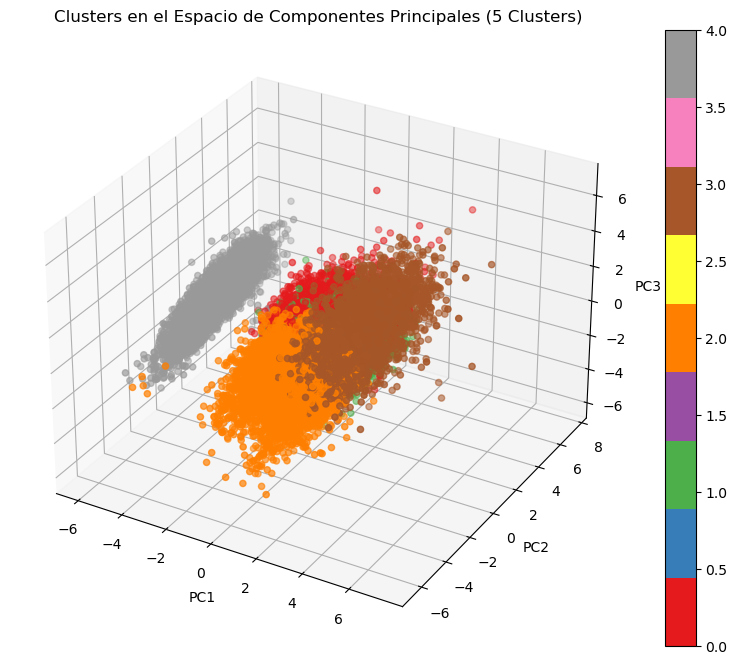

In [134]:

# Crear una figura 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Visualizar los clusters en un gráfico 3D
sc = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=pca_df['Cluster'], cmap='Set1')

# Agregar etiquetas a los ejes y título
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('Clusters en el Espacio de Componentes Principales (5 Clusters)')

# Agregar una barra de color para mostrar los clusters
plt.colorbar(sc)

# Mostrar la gráfica
plt.show()

### Conclusión: En esta clusterización se observa una mejor distribución de los datos donde todos parecen tener similares o importantes cantidades de datos. Eligiremos este número para la comparación con las regiones

# 4) COMPARACIÓN DE CLUSTERS VS LAS REGIONES 

In [135]:
#vemso la distribucion de cada cluster en función de la region

# Ver la distribución de las regiones dentro de cada cluster
cluster_region_distribution = pd.crosstab(pca_df['Cluster'], df['region'])
print(cluster_region_distribution)

region     1     2     3     4    5    6
Cluster                                 
0        947  2318   952   647  588  976
1        855  1940   777   537  468  816
2        570  1387  1290  1094  367  488
3        483  1076   693   363  591  668
4        382  1563   945   878  339  639


In [136]:
region_dict = {
    1: 'Metropolitana',
    2: 'Pampeana',
    3: 'Noroeste',
    4: 'Noreste',
    5: 'Cuyo',
    6: 'Patagónica'
}


In [137]:
#agregamos los nombres de las regiones apra identificar mejor

cluster_region_distribution = cluster_region_distribution.rename(columns=region_dict)
print(cluster_region_distribution)

region   Metropolitana  Pampeana  Noroeste  Noreste  Cuyo  Patagónica
Cluster                                                              
0                  947      2318       952      647   588         976
1                  855      1940       777      537   468         816
2                  570      1387      1290     1094   367         488
3                  483      1076       693      363   591         668
4                  382      1563       945      878   339         639


### Para una mejor interpretación encontraremos el porcentaje de datos cada región en cada cluster  

In [138]:
    #Calcula el total de datos en cada region
#total_por_cluster = cluster_region_distribution.sum(axis=1)
#print(total_por_cluster)

total_por_region =  cluster_region_distribution.sum(axis=0)
print(total_por_region)

region
Metropolitana    3237
Pampeana         8284
Noroeste         4657
Noreste          3519
Cuyo             2353
Patagónica       3587
dtype: int64


In [139]:

# Calcula el porcentaje de datos por región en cada cluster
#cluster_region_percentage = cluster_region_distribution.div(total_por_cluster, axis=0) * 100

region_percentage = cluster_region_distribution.div(total_por_region, axis=1) * 100
print(region_percentage)


region   Metropolitana   Pampeana   Noroeste    Noreste       Cuyo  Patagónica
Cluster                                                                       
0            29.255483  27.981651  20.442345  18.385905  24.989375   27.209367
1            26.413346  23.418638  16.684561  15.260017  19.889503   22.748815
2            17.608897  16.743119  27.700236  31.088377  15.597110   13.604684
3            14.921223  12.988894  14.880825  10.315431  25.116872   18.622805
4            11.801050  18.867697  20.292033  24.950270  14.407140   17.814330


## Conclusión
### Se observa que en función de la región los clusters realmente no establecen una diferencia importante ya que todos parecen estar uniformemente distribuidos en los clusters. Se probará con DBscan ya que este algoritmo debería ser más minucioso en la separación